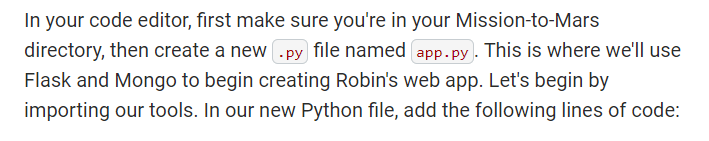

In [ ]:
# Import libraries
from flask import Flask, render_template
from flask_pymongo import PyMongo
import scraping

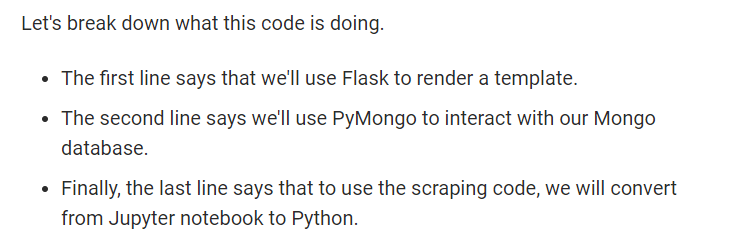

In [ ]:
# Set up Flask
app = Flask(__name__)

We also need to tell Python how to connect to Mongo using PyMongo. Next, add the following lines:

In [ ]:
# Use flask_pymongo to set up mongo connection
app.config["MONGO_URI"] = "mongodb://localhost:27017/mars_app"
mongo = PyMongo(app)

1. app.config["MONGO_URI"] tells Python that our app will connect to Mongo using a URI, a uniform resource identifier similar to a URL.

2. "mongodb://localhost:27017/mars_app" is the URI we'll be using to connect our app to Mongo. This URI is saying that the app can reach Mongo through our localhost server, using port 27017, using a database named "mars_app".

# Set Up App Routes

The code we create next will set up our Flask routes: one for the main HTML page everyone will view when visiting the web app, and one to actually scrape new data using the code we've written.

First, let's define the route for the HTML page. In our script, type the following:

In [ ]:
@app.route("/")
def index():
   mars = mongo.db.mars.find_one()
   return render_template("index.html", mars=mars)

This route, @app.route("/"), tells Flask what to display when we're looking at the home page, index.html (index.html is the default HTML file that we'll use to display the content we've scraped). This means that when we visit our web app's HTML page, we will see the home page.

Within the def index(): function the following is accomplished:

mars = mongo.db.mars.find_one() uses PyMongo to find the "mars" collection in our database, which we will create when we convert our Jupyter scraping code to Python Script. We will also assign that path to themars variable for use later.

return render_template("index.html" tells Flask to return an HTML template using an index.html file. We'll create this file after we build the Flask routes.

This function is what links our visual representation of our work, our web app, to the code that powers it.

Our next function will set up our scraping route. This route will be the "button" of the web application, the one that will scrape updated data when we tell it to from the homepage of our web app. It'll be tied to a button that will run the code when it's clicked.

In [ ]:
@app.route("/scrape")
def scrape():
   mars = mongo.db.mars
   mars_data = scraping.scrape_all()
   mars.update({}, mars_data, upsert=True)
   return redirect('/', code=302)

Let's look at these six lines a little closer.

The first line, @app.route(“/scrape”) defines the route that Flask will be using. This route, “/scrape”, will run the function that we create just beneath it.

The next lines allow us to access the database, scrape new data using our scraping.py script, update the database, and return a message when successful. Let's break it down.

First, we define it with def scrape():.

Then, we assign a new variable that points to our Mongo database: mars = mongo.db.mars.

Next, we created a new variable to hold the newly scraped data: mars_data = scraping.scrape_all(). In this line, we're referencing the scrape_all function in the scraping.py file exported from Jupyter Notebook.

Now that we've gathered new data, we need to update the database using .update(). Let's take a look at the syntax we'll use, as shown below:

In [ ]:
.update(query_parameter, data, options)

We're inserting data, so first we'll need to add an empty JSON object with {} in place of the query_parameter. Next, we'll use the data we have stored in mars_data. Finally, the option we'll include is upsert=True. This indicates to Mongo to create a new document if one doesn't already exist, and new data will always be saved (even if we haven't already created a document for it).

The entire line of code looks like this: mars.update({}, mars_data, upsert=True).

Finally, we will add a redirect after successfully scraping the data: return redirect('/', code=302). This will navigate our page back to / where we can see the updated content.

The final bit of code we need for Flask is to tell it to run. Add these two lines to the bottom of your script and save your work:

In [ ]:
if __name__ == "__main__":
   app.run()

Check out the link Flask:app.py in the Reference guide to see how this looks as an app.py.